# Загрузим данные с метками

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
sns.set()
warnings.simplefilter("ignore")

In [2]:
def ohe_pandas_inplace(data, feature, remove_feature=False):
    for f in datap[feature].unique():
        data[feature + '=' + i] = (data['feature'] == i).astype(float)
    if remove_feature:
        data.drop(labels=[feature], axis=1, inplace=True)

In [3]:
data = pd.read_csv('./data.csv')

![](data_description.png)

https://www.kaggle.com/obrienmitch94/alzheimer-s-analysis

In [4]:
mask = data.CDR.notnull()

In [5]:
data = data[mask]

In [6]:
data.columns

Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay'],
      dtype='object')

In [7]:
data.nunique()

ID       235
M/F        2
Hand       1
Age       51
Educ       5
SES        5
MMSE      17
CDR        4
eTIV     191
nWBV     131
ASF      185
Delay      0
dtype: int64

In [8]:
data.head()

ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
8  OAS1_0010_MR1   M    R   74   5.0  2.0  30.0  0.0  1636  0.689  1.073   
9  OAS1_0011_MR1   F    R   52   3.0  2.0  30.0  0.0  1321  0.827  1.329   

   Delay  
0    NaN  
1    NaN  
2    NaN  
8    NaN  
9    NaN

In [9]:
data.drop(labels=['ID', 'Hand', 'Delay'], axis=1, inplace=True)

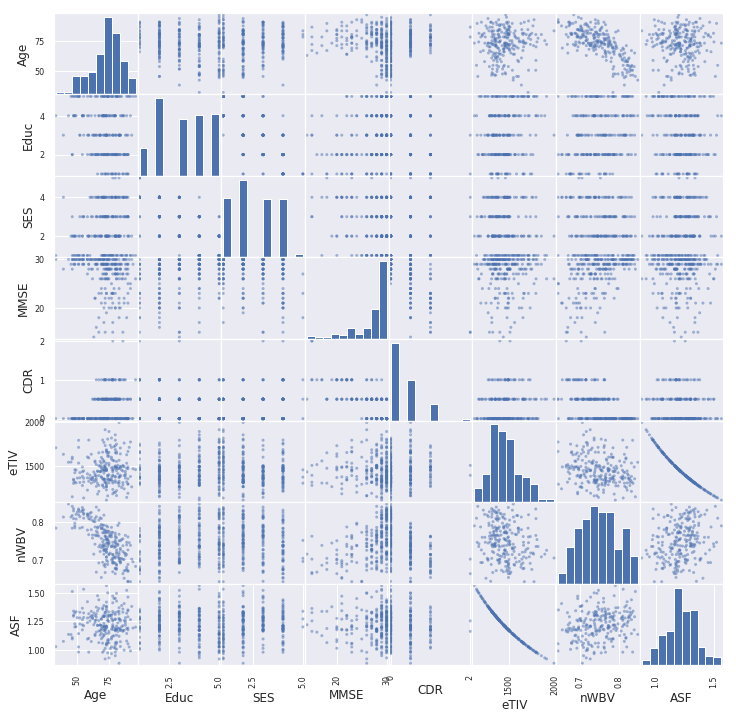

In [10]:
pd.plotting.scatter_matrix(data, figsize=(12, 12))
plt.show()

### Загрузим данные с изображением мозгов(опять, мозги)

Разложим на независимые компоненты датасет предсказания болезни Альцгеймера на ранней стадии (https://www.oasis-brains.org/): База данных состоит из 2D снимков (центральных, поперечного сечения) для 416 субъектов, возрастом от 18 до 96 лет. Данные были предобработаны и стандартизованы, мы развернули их в одномерный вектор и положили в csv файл, все для вас :)

In [11]:
import numpy as np
from matplotlib import pyplot as plt
def spectrum(x):
    f = np.fft.fft2(x)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift))
    return magnitude_spectrum

In [12]:
brain_data = pd.read_csv('./brain_data.csv.zip')[mask]
brain_data.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [13]:
X_brain = np.log(brain_data.values / 255. + 1)
X_brain_image = X_brain.reshape((-1, 176, 176))
age = data.Age.values
cdr = (data.CDR.values == 0).astype(int)

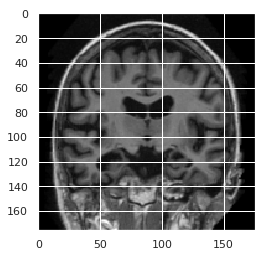

In [14]:
plt.imshow(X_brain_image[2], cmap='gray')
plt.show()

## Наглядное объяснение метода главных компонент

Объяснённая дисперсия: [0.92456389 0.07543611]
Направления главных компонент:
Первая: [ 0.57602521 -0.81743193]
Вторая: [ 0.57602521 -0.81743193]


(-3.598747052106358, 4.233102008617606, -6.023561231729377, 5.4514789279067335)

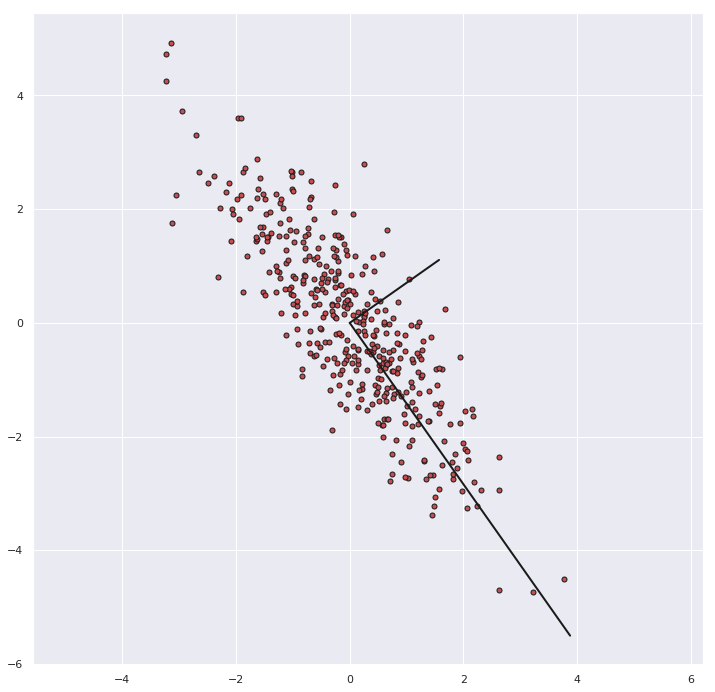

In [17]:
mean = np.array([0.0, 0.0])
cov  = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])

X = np.random.multivariate_normal(mean, cov, 400)

pca = PCA(n_components=2)
pca.fit(X)

print("Объяснённая дисперсия: {}".format(pca.explained_variance_ratio_))
print("Направления главных компонент:")
print("Первая: {}".format(pca.components_[0]))
print("Вторая: {}".format(pca.components_[0]))


plt.figure(figsize=(12, 12))

plt.scatter(X[:, 0], X[:, 1], s=25, c='r', marker='o', edgecolor='k')

for var_ratio, direction in zip(pca.explained_variance_ratio_, pca.components_):
    d = 7 * np.sqrt(var_ratio) * direction
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=2)

plt.axis('equal')

### Применим PCA к изображениям мозгов

In [18]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
def plot_embedding(X, y, images_small=None, title=None):
    """
    Функция для рисования эмбеддингов 
    с цветами соответствующими y
    """
    # take only first two columns
    X = X[:, :2]
    # scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(13,8))
    ax = plt.subplot(111)
    for i in range(X.shape[0] - 1):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.RdGy(y[i]),
                 fontdict={'weight': 'bold', 'size': 12})
        if images_small is not None:
            imagebox = OffsetImage(images_small[i], zoom=.3)
            ab = AnnotationBbox(imagebox, (X[i, 0], X[i, 1]),
                xycoords='data')                                  
            ax.add_artist(ab)
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-1:
                # don't show points that are too close
                continue
    if title is not None:
        plt.title(title)

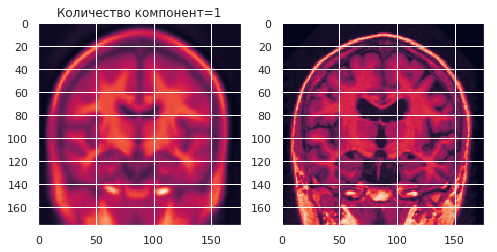

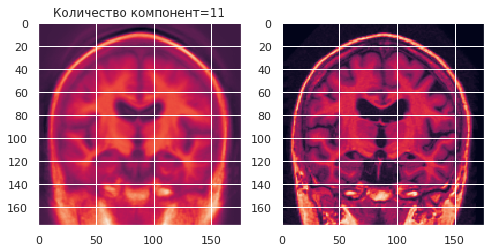

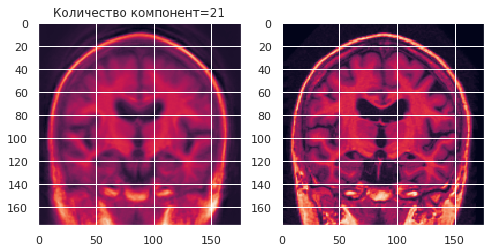

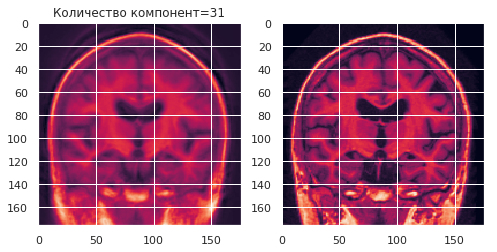

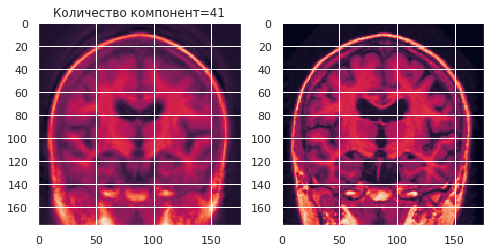

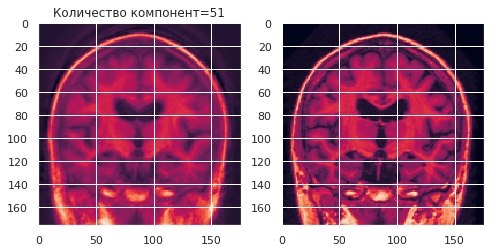

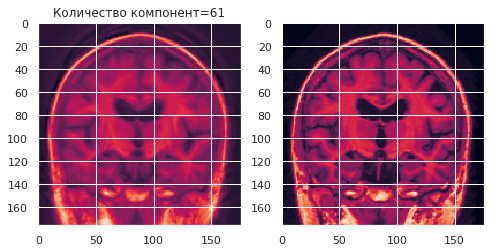

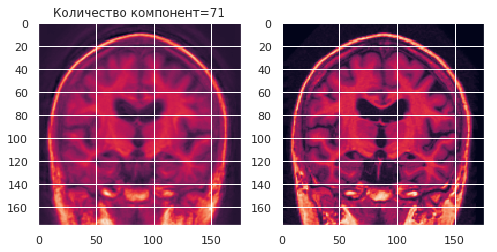

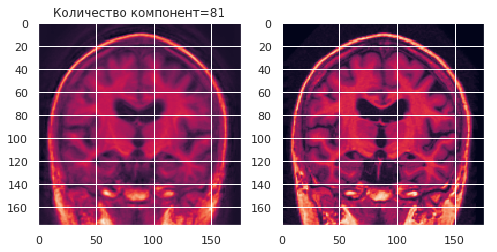

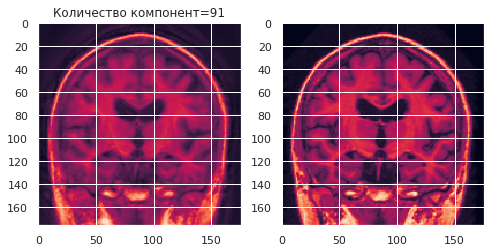

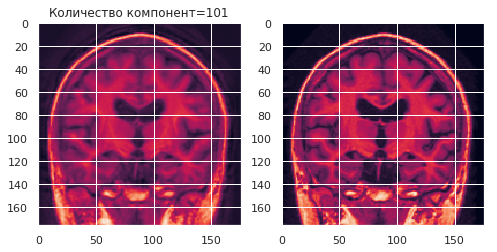

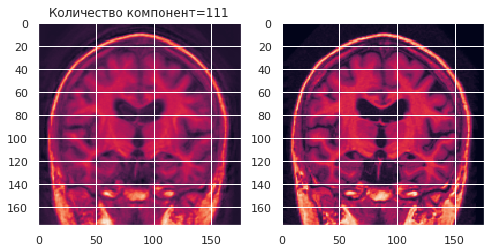

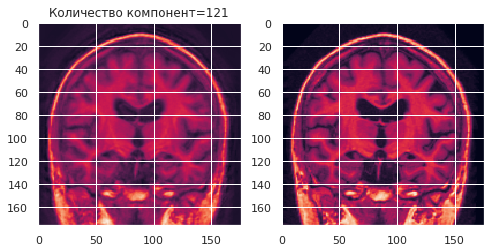

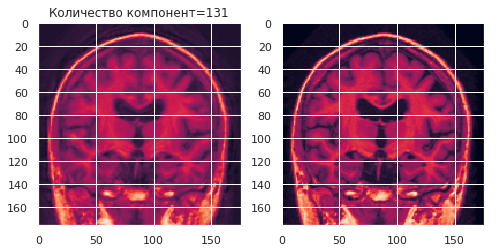

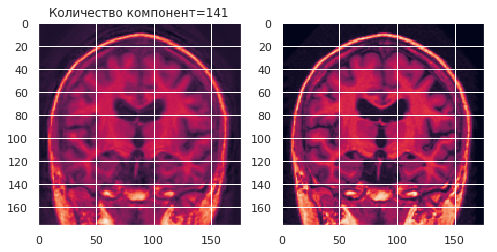

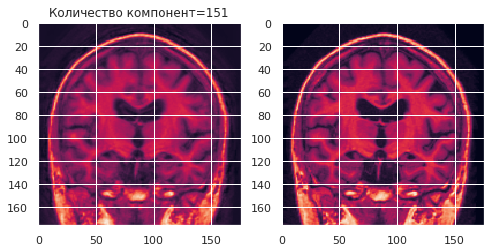

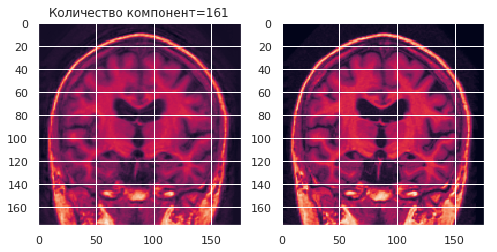

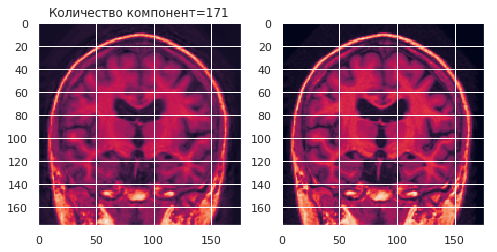

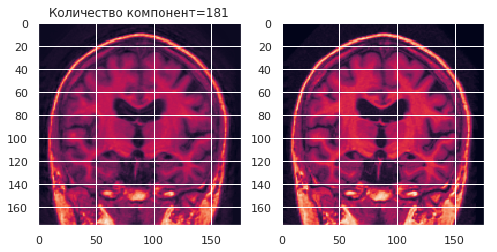

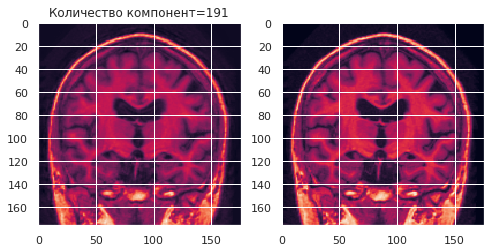

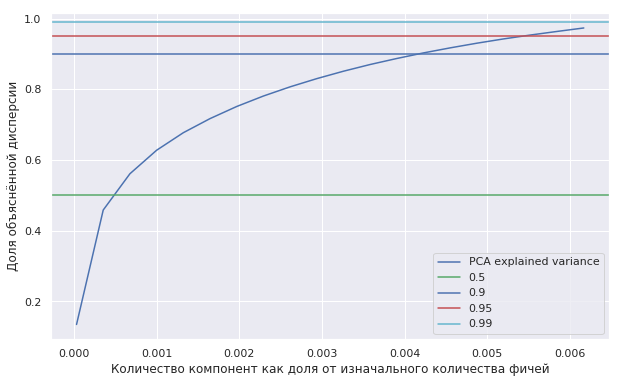

In [19]:
n_components = np.arange(1, 200, 10)
pca_error = []

for n in n_components:
    pca = PCA(n_components=n).fit(brain_data)
    # возвращает норму Фробениуса оригинала от реконструкции
    pca_error.append(pca.explained_variance_ratio_.sum())
    fig, ax = plt.subplots(1, 2, figsize=(8, 6))
    ax[0].imshow(pca.inverse_transform(pca.transform(brain_data))[0].reshape((176, 176)))
    ax[0].set_title("Количество компонент={}".format(n))
    ax[1].imshow(X_brain_image[0])
    plt.show()
    
# Построим, что у нас получилось    
plt.figure(figsize=(10, 6))
plt.plot(n_components / brain_data.shape[1], pca_error, "-", label='PCA explained variance')
plt.axhline(y=0.5, linestyle='-', c='g', label='0.5')
plt.axhline(y=0.9, linestyle='-', c='b', label='0.9')
plt.axhline(y=0.95, linestyle='-', c='r', label='0.95')
plt.axhline(y=0.99, linestyle='-', c='c', label='0.99')
plt.xlabel('Количество компонент как доля от изначального количества фичей')
plt.ylabel('Доля объяснённой дисперсии')
plt.legend()

### PCA

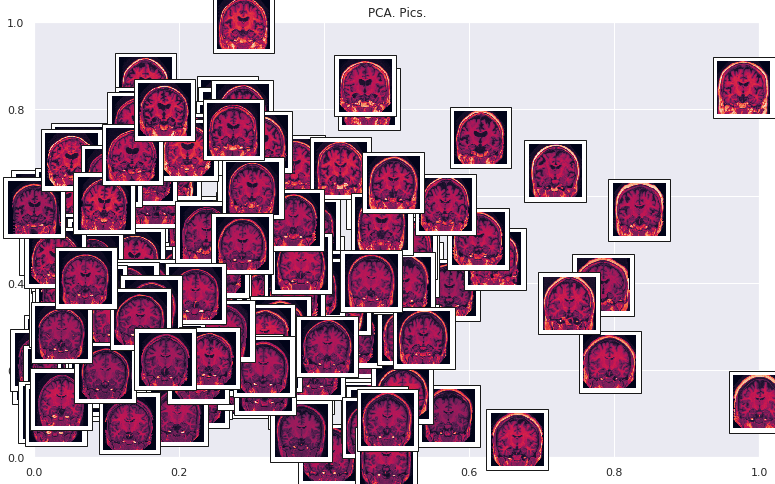

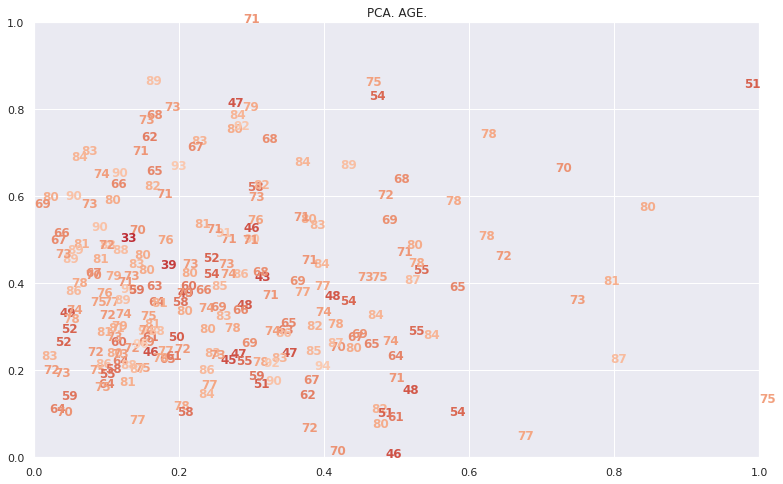

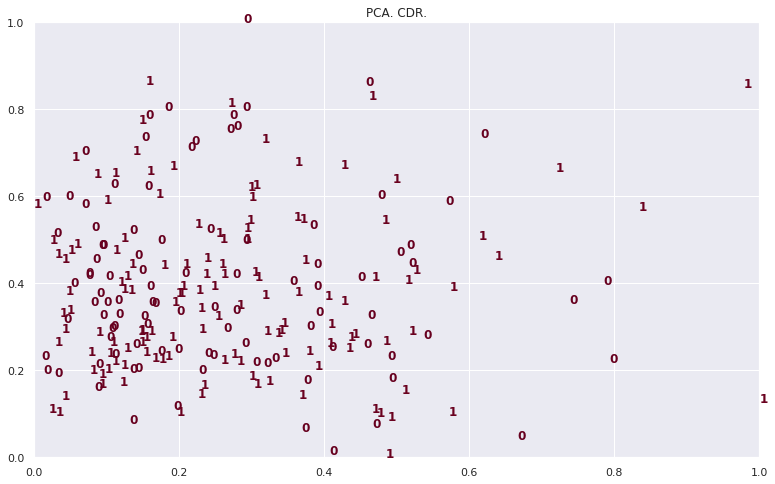

In [20]:
X_projected = PCA(n_components=2).fit_transform(brain_data)

plot_embedding(X_projected, cdr, X_brain_image, "PCA. Piсs.")
plot_embedding(X_projected, age, title="PCA. AGE.")
plot_embedding(X_projected, cdr, title="PCA. CDR.")

## 0.1. ICA

ICA представляет собой метод линейного уменьшения размеров, который пытается восстановить независимые компоненты в сигнале. Так же ICA называют методом слепого разложения сигнала для «задачи коктейльной вечеринки». 


ICA является важным инструментом в анализе нейровизуализации, fMRI и EEG, который помогает отделить полезные сигналы от аномальных (шумов и артефактов). 

ICA предполагает, что каждый образец данных представляет собой смесь независимых компонент, и он стремится найти эти независимые компоненты. В основе ICA лежит «НЕЗАВИСИМОСТЬ». Мы должны сначала попытаться понять это.

Когда можно смело сказать, что две переменные независимы? Чем он отличается от «Корреляции»? И, наконец, как вы измеряете степень независимости?

##### Вопрос 1: почему Гауссовые переменные плохо разделяются с ICA?

Согласно Центральной предельной теореме https://en.wikipedia.org/wiki/Central_limit_theorem, сумма независимых случайных переменных ближе к гауссу чем каждая из величин сама по себе. 

Поэтому возникает интуиция, что чтобы восстановить исходные переменные, мы должны заложить требования «негауссовости» в них. 

В случае распределения Гаусса, независимые гауссовские переменные также независимы, это уникальное свойство, связанное с распределением Гаусса.

Давайте рассмотрим простой пример, чтобы понять эту концепцию. Посмотрим на четыре набора данных - два из гауссовского распределения и два из равномерного распределения.

##### Подход ICA к проблеме выделения независимых компонент основан на трех предположениях:

* процесс смешивания является линейным;
* все сигналы источника не зависят друг от друга;
* все исходные сигналы имеют не-гауссовское распределение.

##### Вопросы:

  * Сработает ли метод с одной гауссовой переменной(или 2)?
  * Какие переменные называются независимыми?

###### Почему важно что исходные сигналы имеют не-гауссовское распределение?

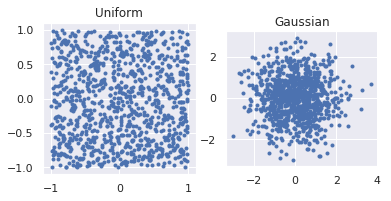

In [21]:
np.random.seed(100)
U1 = np.random.uniform(-1, 1, 1000) # генерируем семплы для двумерного равномерного распределения
U2 = np.random.uniform(-1, 1, 1000)

G1 = np.random.randn(1000) # генерируем семплы для двумерного нормального распределения
G2 = np.random.randn(1000)

%matplotlib inline

from matplotlib import pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(121, aspect = "equal")
ax1.scatter(U1, U2, marker = ".")
ax1.set_title("Uniform")


ax2 = fig.add_subplot(122, aspect = "equal")
ax2.scatter(G1, G2, marker = ".")
ax2.set_title("Gaussian")


plt.show()

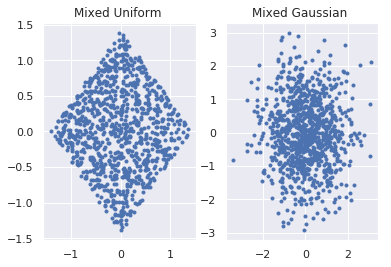

In [22]:
# возьмем случайную Матрицу А, но которую мы домножим наши распределения
A = np.array([[1, 0], [1, 2]])
A = np.array([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), - 1 / np.sqrt(2)]])

U_source = np.array([U1,U2])
U_mix = U_source.T.dot(A)

G_source = np.array([G1, G2])
G_mix = G_source.T.dot(A)


fig  = plt.figure()

ax1 = fig.add_subplot(121)
ax1.set_title("Mixed Uniform ")
ax1.scatter(U_mix[:, 0], U_mix[:,1], marker = ".")

ax2 = fig.add_subplot(122)
ax2.set_title("Mixed Gaussian ")
ax2.scatter(G_mix[:, 0], G_mix[:, 1], marker = ".")


plt.show()   

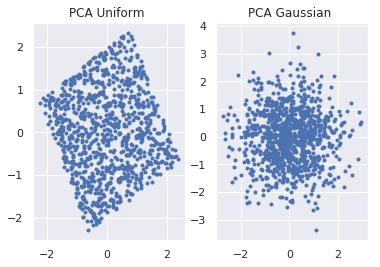

In [23]:
# PCA с отбелением данных (whitening)
from sklearn.decomposition import PCA 
U_pca = PCA(whiten=True).fit_transform(U_mix)
G_pca = PCA(whiten=True).fit_transform(G_mix)

# let's plot the uncorrelated columns from the datasets
fig  = plt.figure()

ax1 = fig.add_subplot(121)
ax1.set_title("PCA Uniform ")
ax1.scatter(U_pca[:, 0], U_pca[:,1], marker = ".")

ax2 = fig.add_subplot(122)
ax2.set_title("PCA Gaussian ")
ax2.scatter(G_pca[:, 0], G_pca[:, 1], marker = ".")

Как видите, в случае гауссовых переменных мы потеряли информацию о матрице A!

#####  Вопрос 2: Как можно оценить меру негауссовости процесса?


Через kurtosis(коэффициент эксцесса) и негэнтропию: http://fourier.eng.hmc.edu/e161/lectures/ica/node4.html

Идея в том, что гаусс обладает самой высокой энтропией среди всех распределений с одинаковой дисперсией, поэтому если мы хотим найти негауссово распределение, то нам нужно добавить регуляризацию на его энтропию:

$$H(\mathcal{N}(0, \sigma^2)) - H(p(x))) \geq C$$

И интересной особенностью этого выражения является то что оно выражается через коэффициент эксцесса, т.е.

$$H(\mathcal{N}(0, \sigma^2)) - H(p(y))) \approx \frac{1}{12} \mathbb E[y^3]^2 + \frac{1}{48} kurt(x)^3 \geq C$$

Однако так как мы рассматриваем совместное распределение большого числа величин, то удобнее вести речь в терминах энтропий и взаимных информаций.

#### Избавляется от нелинейной зависимости

Мы можем минимизировать нелинейную зависимость, уменьшая взаимную информацию между переменными. Из теории информации взаимную информацию можно определить как:

<center>$MI$ = сумма энтропий маргинальных функций распределения - энтропия функции совместного распределения:<p>
    
Где энтропия - это показатель средней информации, содержащейся в данных. Для переменной $ x $ с распределением $p(x)$ она определяется как

$$ H(x) = - \sum\limits_{i}\,(\,p\,(x_i) \times \log_2 p(\,x_i\,))$$
    
![](http://fourier.eng.hmc.edu/e161/lectures/figures/mutual_info.gif)

Итак, для нахождения энтропии двух переменных $ x $, $ y $ мы должны минимизировать следующую функцию, где $z = p(x, y) $ совместная плотность распределения  $x$ и $y$:
    
$$MI = H(x)+ H(y) - H(z)$$


Предположим, что W - это матрица преобразования, которую нам нужно умножить на $X_{new}$, чтобы удалить зависимость более высокого порядка. Затем мы можем определить

$$MI = \sum\limits_{i}H(W_i\times X_{pca_{i}}) - H(W\times X_{pca})$$
    
$$MI = \sum\limits_{i}H(W_i\times X_{pca_{i}}) - H(X_{pca}) + \log_2 |W|$$


Поскольку $ W $ является матрицей вращения, ее определитель равен 1, поэтому $ \log_2 |W| = 0 $. Теперь $ H (X_ {pca}) $ не зависит от $ W $, поэтому мы можем отбросить его:


$$MI =  \sum\limits_{i}(H(W_i\times X_{pca_{i}}))$$


Таким образом,  


$$W = \arg\min_{W}\sum\limits_{i}(H(W_i\times X_{pca_{i}}))$$
    

Есть еще один способ найти матрицу $W_{negentropy} $, которая определяется выражением 

$$J(y) = H(y_g) - H(y)$$
    

Где $ H $ - энтропия, $ y $ - наш $X_ {pca}$, а $ x_ {gauss} $ - гауссовский случайный вектор с той же ковариацией, что и $ y $.
      
Среди всех распределений распределение Гауссово, как известно имеет наибольшую энтропию. Негентропия равна нулю, если $ y $ гауссова, и ненулевая, когда $ y $ не гауссов. Мы можем максимизировать функцию негэнтропии, чтобы получить матрицу $ W $.

При этом, $MI = константа - J (y)$.
    
Таким образом, оба метода сводятся к расчету энтропии, для которого нам нужно знать плотность распределения неизвестных переменных.

Оценивать распределения задача неблагодарная, плюс численно сложная, поэтому нужно делать аппроксимации.

Как мы говорили выше, одна из возможных аппроксимаций выражается через куртозис и третий момент, но такое приближение не очень робастное.

__(Hyvärinen, 1998b)__ предложил более хороший способ оценки негэнтропии:

$$J(y) = \sum\limits_{i=1}^{p} k_i \left[ \mathbb E G_i(y) - \mathbb E G_i(\mathcal N(0, 1))\right]^2, $$

*1. Заметим, что если $G = y^4$, то это превращается в формулу с куртозисом, т.е. это обобщение более частного уравнения.*

*2. Заметим, что второй член не зависит от данных, поэтому далее мы его опустим*

Где $g_i$ — некоторые хорошие функции. Примеры хороших функций:

$$G_1(y) =  \tanh(ay)$$

$$G_2(y) = -\exp(-y^2/2)$$

$$G_3(y) = -y \exp(-y^2/2)$$

$$G_4(y) = \log \cosh a_1 y$$

#### Псевдокод ICA

http://fourier.eng.hmc.edu/e161/lectures/ica/node7.html

Напомню, что мы ищем матрицу $W$, для следующего линейного преобразования данных $X$ в декоррелированные данные $Y$: 

$$Y = W X$$

Выписываем лагранжиан с использованием теоремы Каруша-Куна-Таккера(для обеспечения нормировки векторов $w$):

$$\mathcal{L} = \mathbb{E} G(w^T x) - \beta(w^T w - 1) / 2$$

Теперь мы можем свести задачу к задаче оптимизации функционала методом Ньютона(градиентный метод второго порядка). Тогда после нехитрых шагов выписывания производных, мы получаем красивую формулу для обновления текущей оценки W:


$$W = \mathbb E\{ XG(W^T X) \} - \mathbb E\{g(W^T X)\}W$$

$$W = \frac{W}{||W||}$$
 
где $G$ - аппроксимирующая функция, а $g$ - производная от $G$.

Прочитать про имплементацию можно [здесь](https://www.cs.helsinki.fi/u/ahyvarin/papers/bookfinal_ICA.pdf).

Псевдокод для нахождения W матриц:

1.$\hspace{1em}$ for $i$ in (1, number of sources):
2.    $\hspace{1em}W_i$ = random vector (initialization of  $W_i$) <p>
    $\hspace{1em}$while $W$ changes: 
4. $\hspace{2em}W_i$ = $\mathbb E\{XG($$W_i^T$$ X)\} - \mathbb E\{g(W_i^T X\}W_i\hspace{2em}$ (update of w)
5.    $\hspace{2em}W_i$ = $W_i$ - $\sum\limits_{j=0}^{i-1}W_iW_jW_j$   $\hspace{1em}$(orthogonalization of $W_i$ w.r.t other vectors of $W$ using gram-schmidt process)
6.    $\hspace{2em}W = W/||W||$
 
Таким образом, мы получаем $W_i$ ортогональную всем  $W$ векторам.  

In [25]:
# approximating function is G(x) = x \exp(-x**2 / 2)
def g(x):
    return x**3

def gprime(x):
    return 3 * x**2


# update of Wi
def update_vector(W, X):
    Y1 = W.dot(X)
    f1 =  (X * g(Y1)).mean(axis = 1)
    f2 = gprime(Y1).mean() * W
    W = f1 - f2
    return(W)

# orthonormalize the Wi
def orthonormalize(W, w, k):
    C= np.zeros_like(w)
    
    for j in range(k):
        C = C + np.dot(w, W[j].T) * W[j]
        
    w = w - C
    return(w / np.sqrt((w * w).sum()))

# calculation of unmixing matrix
# X.shape = number_of_dimensions, number of samples
def calculate_V(X, W_init):
    n_f, n_sample = X.shape
    W = np.zeros((n_f, n_f))
    
    for i in range(n_f):
        w = W_init[i, :].copy()
        w /= np.sqrt((w**2).sum())
        w_old = np.zeros((1, n_f))
        j=0
        max_iter = 1000
        while (np.abs(np.abs((w*w_old).sum())-1) > 1e-3 and (j < max_iter-1)):
            w_old = w
            w = update_vector(w, X)
            w = orthonormalize(W, w, i)
            j +=1
        W[i, :] = w
    return(W)

In [26]:
# selection of number of components
# W = unmixing matrix
# S = source signal matrix
def ICA(X, n_comp=None):
    
    X = (X - X.mean(axis = 0))/(X.std(axis=0))
    pca = PCA(whiten=True)
    X_pca = pca.fit_transform(X)
    explained_var = pca.explained_variance_
    if not n_comp:
        n_comp = np.argmax(np.cumsum(explained_var)/explained_var.sum() > 0.99)+1
    K = pca.components_[0:n_comp]/pca.singular_values_
    X_pca = X_pca[:,0:n_comp]
    W_init = np.random.rand(n_comp, n_comp)
    V = calculate_V(X_pca.T, W_init)
    S = V.dot(X_pca.T)
    
    W = V.dot(K)
    
    return(W, S,V,K)

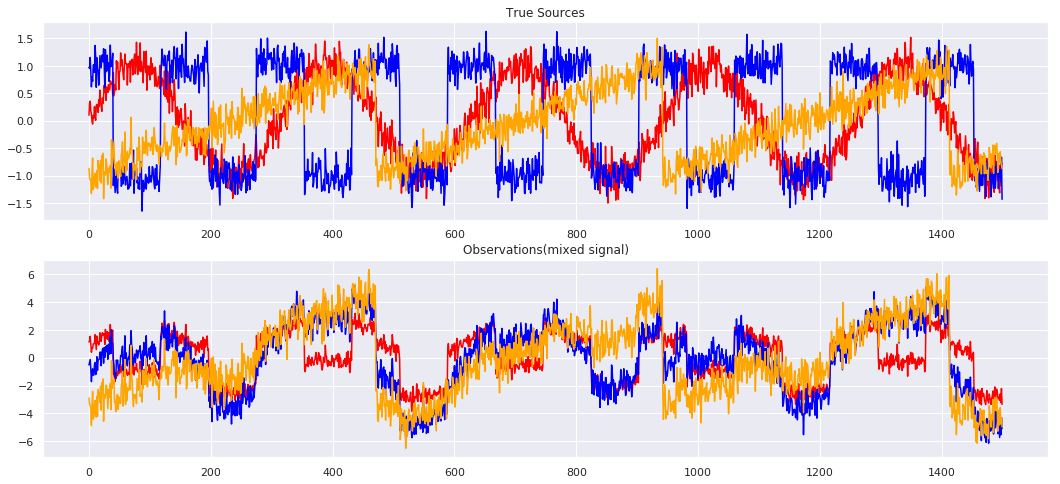

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
np.random.seed(42)
num_rows = 3000
n_samples=1500
t = np.linspace(0,10, n_samples)
# create signals sources
s1 = np.sin(3*t) # a sine wave
s2 = np.sign(np.cos(6*t)) # a square wave
s3 = signal.sawtooth(2 *t) # a sawtooth wave
# combine single sources to create a numpy matrix
S = np.c_[s1,s2,s3]

# add a bit of random noise to each value
S += 0.2 * np.random.normal(size = S.shape)

# create a mixing matrix A
A = np.array(
    [
        [1, 1.5, 0.5], 
        [2.5, 1.0, 2.0], 
        [1.0, 0.5, 4.0]
    ]
)

X = S.dot(A.T)

#plot the single sources and mixed signals
plt.figure(figsize =(18, 8))
colors = ['red', 'blue', 'orange']

plt.subplot(2,1,1)
plt.title('True Sources')
for color, series in zip(colors, S.T):
    plt.plot(series, color)
plt.subplot(2,1,2)
plt.title('Observations(mixed signal)')
for color, series in zip(colors, X.T):
    plt.plot(series, color)

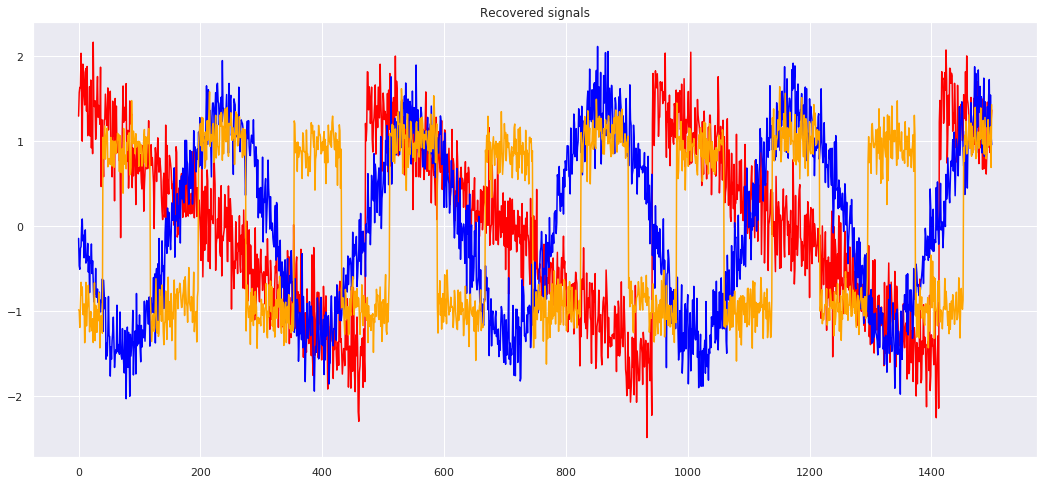

In [28]:
# Теперь разложим на независимые компоненты наш сигнал:
W_, S_,V_ , K_= ICA(X, 3)
plt.figure(figsize =(18, 8))
plt.title('Recovered signals')
for color, series in zip(colors, S_):
    plt.plot(series, color)
plt.show()

# 3. Вспомним задачу, которую мы не решили с PCA

In [29]:
from sklearn.decomposition import PCA, FastICA
from numpy import dot

In [38]:
30976 / 192

161.33333333333334

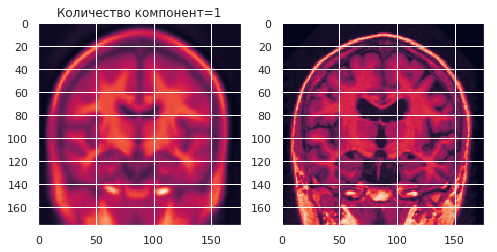

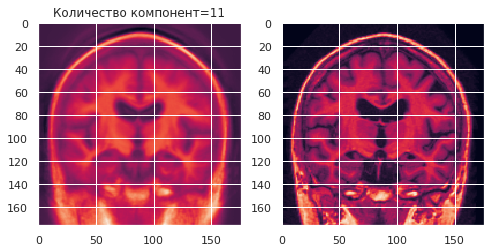

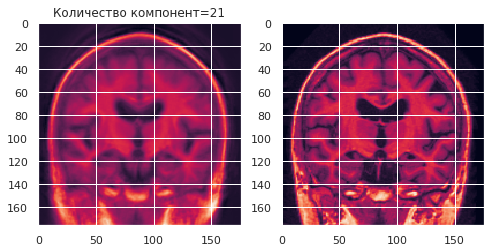

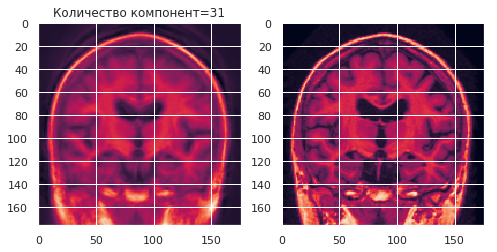

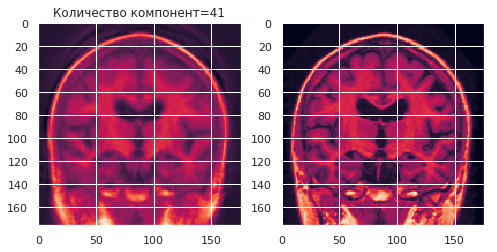

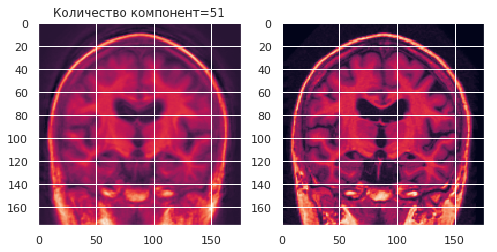

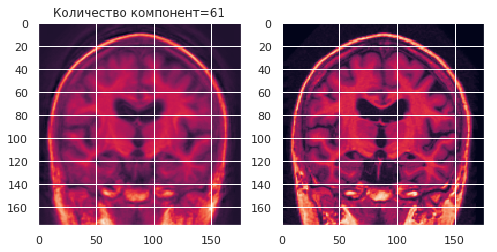

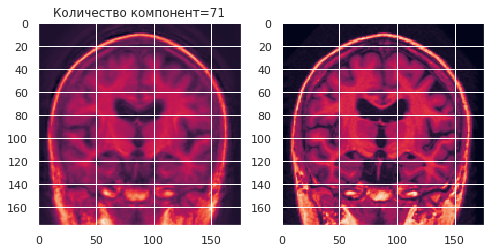

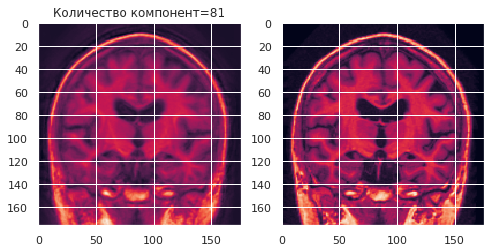

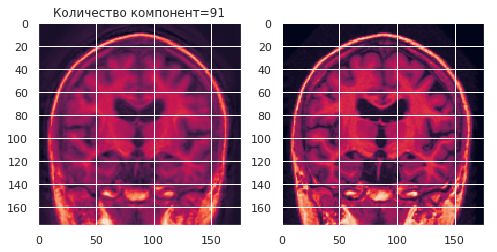

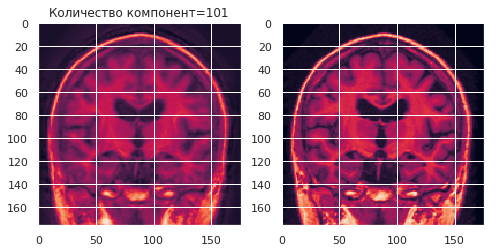

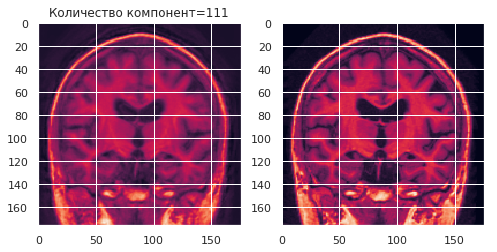

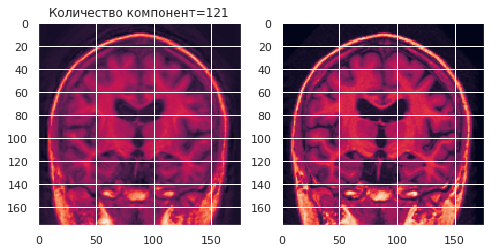

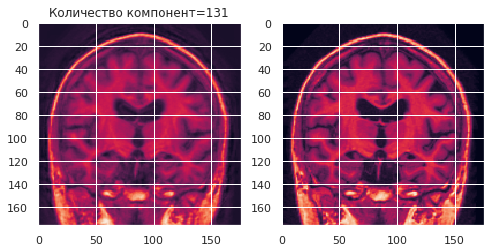

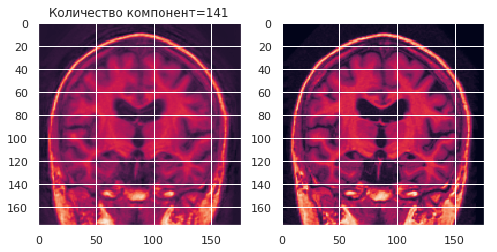

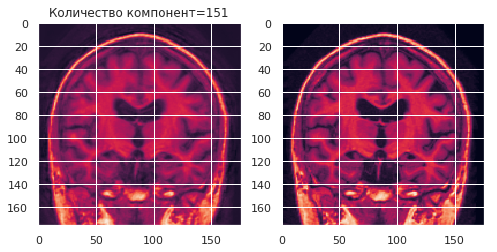

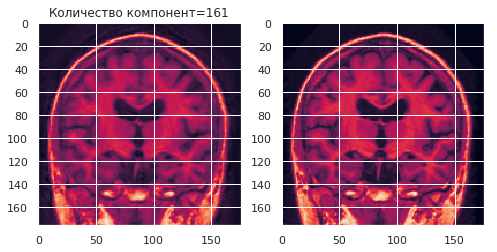

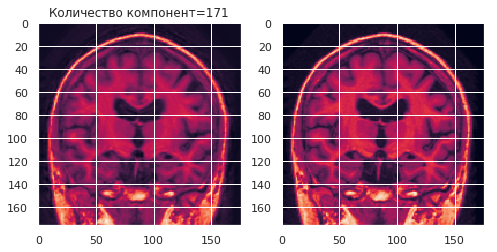

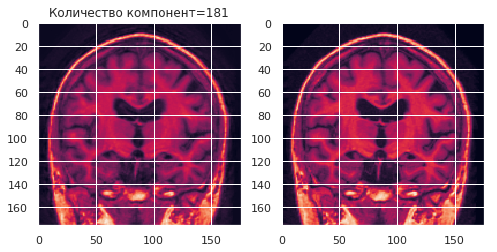

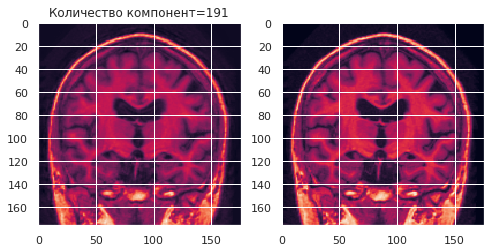

In [39]:
n_components = np.arange(1, 200, 10)
pca_error = []

for n in n_components:
    ica = FastICA(n_components=n).fit(brain_data)
    # возвращает норму Фробениуса оригинала от реконструкции
    # pca_error.append(ica.explained_variance_ratio_.sum())
    fig, ax = plt.subplots(1, 2, figsize=(8, 6))
    ax[0].imshow(ica.inverse_transform(ica.transform(brain_data))[0].reshape((176, 176)))
    ax[0].set_title("Количество компонент={}".format(n))
    ax[1].imshow(X_brain_image[0])
    plt.show()

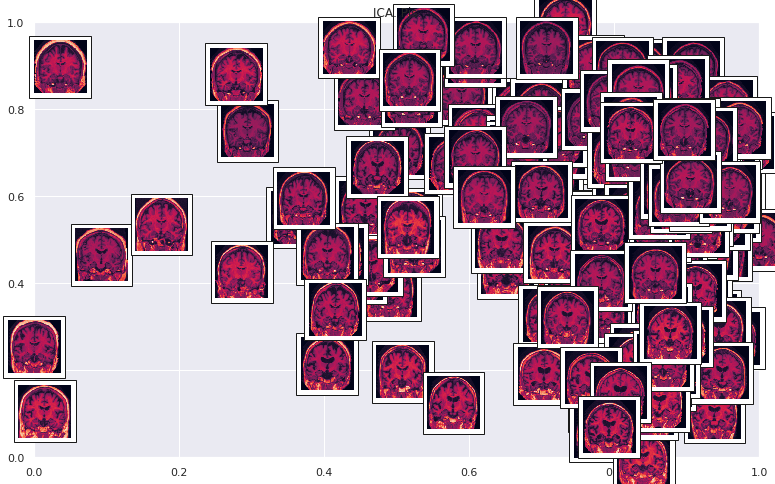

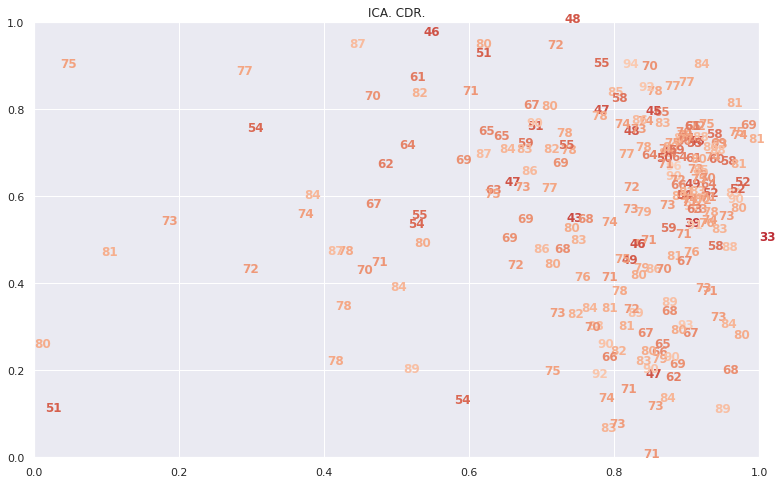

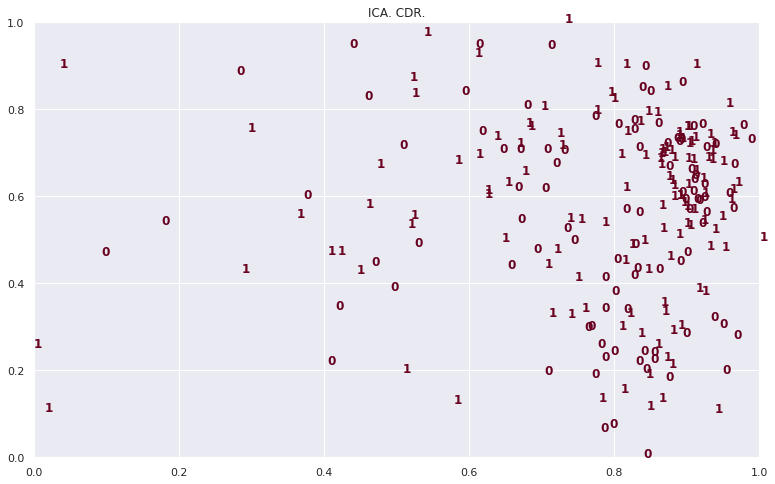

In [40]:
X_projected = FastICA(n_components=3, max_iter=1000).fit_transform(brain_data)

plot_embedding(X_projected, cdr, X_brain_image, "ICA. Pis.")
plot_embedding(X_projected, age, title="ICA. CDR.")
plot_embedding(X_projected, cdr, title="ICA. CDR.")